# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.


In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.optimize import curve_fit
from sklearn.svm import SVC
from random import sample
from sklearn.metrics import mean_squared_error



from sklearn.tree import export_graphviz 
# conda install python-graphviz
import graphviz

import warnings
warnings.filterwarnings('ignore')

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [2]:
flights= pd.read_csv('/Users/kamininayyar/Documents/GitHub/flight_dataframe.csv')
flights.head(2)

,fl_date,op_unique_carrier,crs_elapsed_time,actual_elapsed_time,air_time,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,distance,wheels_on,wheels_off,taxi_out,taxi_in,flight_delay
0,2018-02-20,American AirlinesInc.,117,144.0,110.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",1443.0,-2.0,1607.0,25.0,592,1558.0,1508.0,25.0,9.0,1
1,2018-05-12,Delta Air Lines Inc.,124,114.0,92.0,"Atlanta, GA","Philadelphia, PA",830.0,-2.0,1024.0,-12.0,666,1013.0,841.0,11.0,11.0,0


In [3]:
flights.isnull().sum()

fl_date                   0
op_unique_carrier         0
crs_elapsed_time          0
actual_elapsed_time    1968
air_time               2251
origin_city_name          0
dest_city_name            0
dep_time                  0
dep_delay               225
arr_time                284
arr_delay              2099
distance                  0
wheels_on               569
wheels_off              285
taxi_out                285
taxi_in                 569
flight_delay              0
dtype: int64

In [4]:
fli_analysis = flights.dropna()


In [5]:
fli_analysis.isnull().sum()

fl_date                0
op_unique_carrier      0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
origin_city_name       0
dest_city_name         0
dep_time               0
dep_delay              0
arr_time               0
arr_delay              0
distance               0
wheels_on              0
wheels_off             0
taxi_out               0
taxi_in                0
flight_delay           0
dtype: int64

In [6]:
# preparing a Linear Regression Model
import statsmodels.api as sm
x = fli_analysis[['arr_delay']]
y = fli_analysis['flight_delay']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           flight_delay   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                 2.771e+05
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:59:00   Log-Likelihood:            -4.1386e+05
No. Observations:              783771   AIC:                         8.277e+05
Df Residuals:                  783769   BIC:                         8.277e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3243      0.000    695.671      0.0

In [7]:
# checking for Linearity
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_train_sample = fli_analysis['arr_delay'].values.reshape(-1, 1)
y_train_sample = fli_analysis['dep_delay']

lr_sample = LinearRegression()

In [8]:
lr_sample.fit(X_train_sample, y_train_sample)

LinearRegression()

In [9]:
lr_sample.predict(X_train_sample)[:5]

array([ 28.38542481,  -5.58899712, -10.18013522,  38.48592863,
        52.25934293])

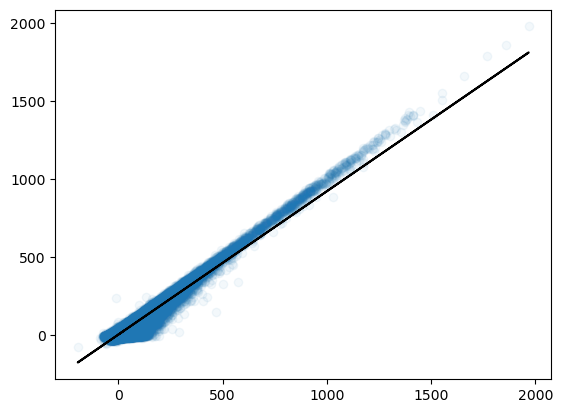

In [10]:
plt.scatter(X_train_sample, y_train_sample, alpha=0.05);
plt.plot(X_train_sample, (lr_sample.coef_*X_train_sample)+lr_sample.intercept_, c='black')

In [11]:
lr_sample.score(X_train_sample, y_train_sample)

0.9252747367025742

### Feature Engineering/ (Feature Reduction)

In [12]:
from sklearn.datasets import load_linnerud
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [13]:
fli_analysis.head(2)


,fl_date,op_unique_carrier,crs_elapsed_time,actual_elapsed_time,air_time,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,distance,wheels_on,wheels_off,taxi_out,taxi_in,flight_delay
0,2018-02-20,American AirlinesInc.,117,144.0,110.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",1443.0,-2.0,1607.0,25.0,592,1558.0,1508.0,25.0,9.0,1
1,2018-05-12,Delta Air Lines Inc.,124,114.0,92.0,"Atlanta, GA","Philadelphia, PA",830.0,-2.0,1024.0,-12.0,666,1013.0,841.0,11.0,11.0,0


In [14]:
from sklearn.preprocessing import StandardScaler
features = ['crs_elapsed_time', 'actual_elapsed_time', 'dep_delay', 'wheels_on','wheels_off','taxi_out','taxi_in','flight_delay']

# Separating out the features
x = fli_analysis.loc[:, features].values
# Separating out the target
y = fli_analysis.loc[:,['arr_delay']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

        principal component 1  principal component 2
0                    0.456327               0.818432
1                   -0.724302              -1.447961
2                   -1.707118              -0.944254
3                    2.773409               1.236853
4                    5.263519               1.263206
...                       ...                    ...
783766              -0.665420               1.179282
783767              -1.282147              -1.169822
783768              -0.662192              -0.057535
783769              -0.708356               1.111752
783770               0.215847               0.545677

[783771 rows x 2 columns]


### Modeling

- Random Forest
- XGBoost


In [16]:
# I am going to do a Random Forest using the main flights DataFrame
flights.head(2)


,fl_date,op_unique_carrier,crs_elapsed_time,actual_elapsed_time,air_time,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,distance,wheels_on,wheels_off,taxi_out,taxi_in,flight_delay
0,2018-02-20,American AirlinesInc.,117,144.0,110.0,"Dallas/Fort Worth, TX","Colorado Springs, CO",1443.0,-2.0,1607.0,25.0,592,1558.0,1508.0,25.0,9.0,1
1,2018-05-12,Delta Air Lines Inc.,124,114.0,92.0,"Atlanta, GA","Philadelphia, PA",830.0,-2.0,1024.0,-12.0,666,1013.0,841.0,11.0,11.0,0


In [17]:
flights.flight_delay.value_counts()

0    510991
1    275380
Name: flight_delay, dtype: int64

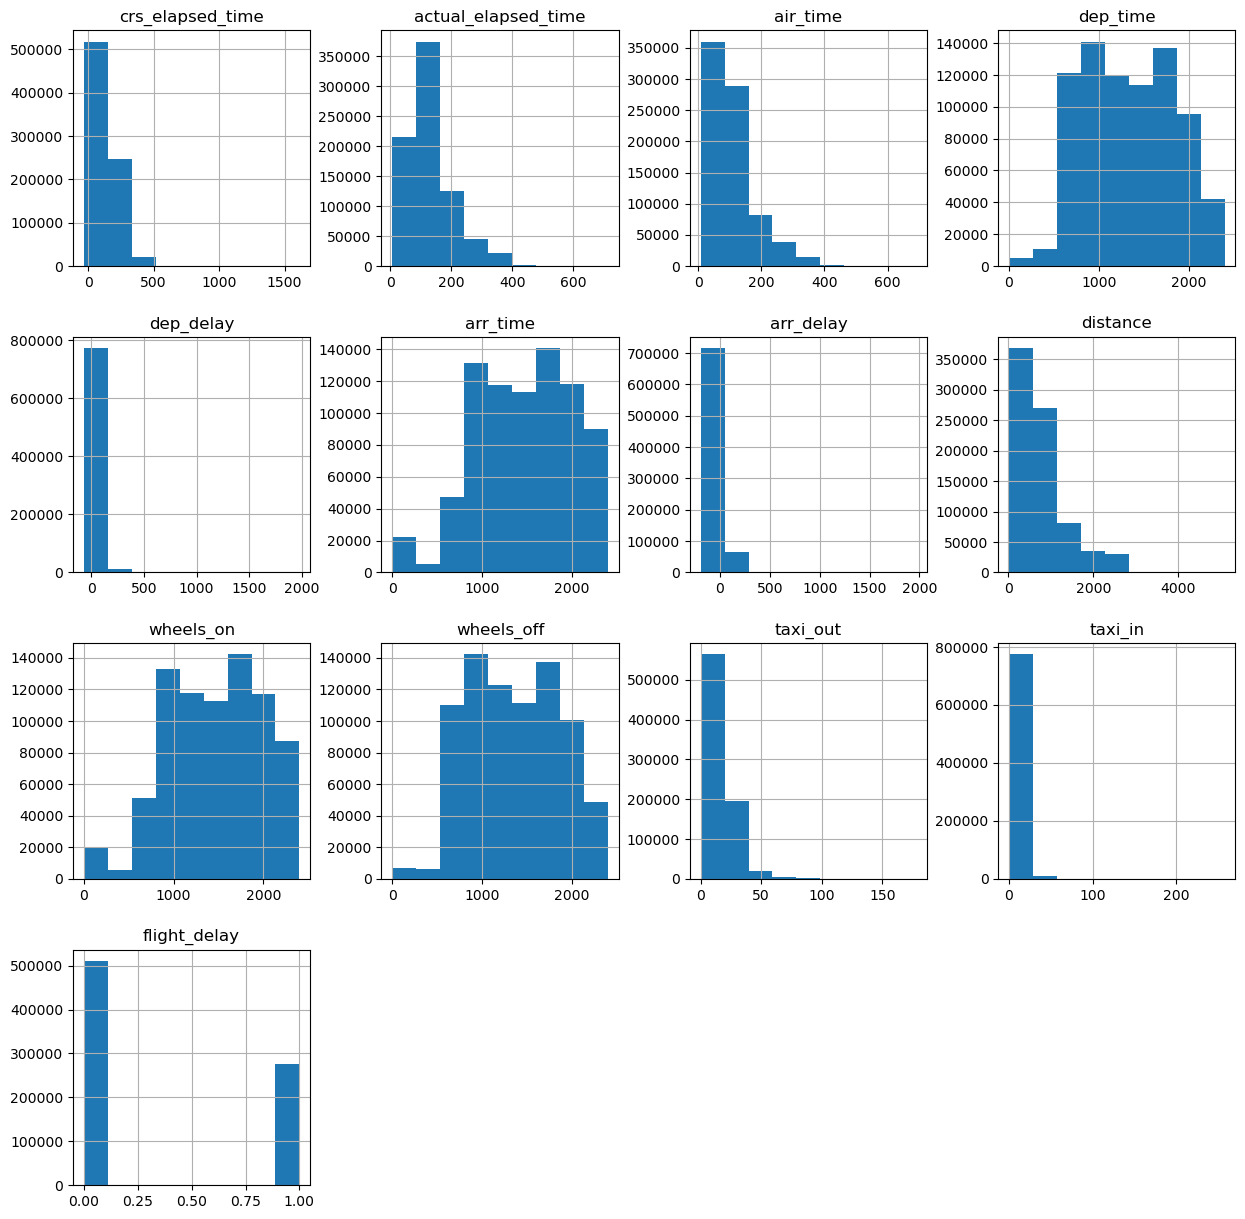

In [18]:

# To observe the data again let's plot all the feature into a histogram
flights.hist(figsize  = [15, 15],bins=9) 
plt.show()

In [22]:
#let's start with Dep_delay or arr_delay. Also for the analysis, we'll have to drop some columns with strings
flights2 = flights.drop(['op_unique_carrier', 'fl_date', 'actual_elapsed_time', 'air_time', 'origin_city_name', 'dest_city_name', 'dep_time', 'dep_delay', 'taxi_in', 'taxi_out','wheels_on','wheels_off'], axis=1)
flights2.head(2)
flights2.dtypes

crs_elapsed_time      int64
arr_time            float64
arr_delay           float64
distance              int64
flight_delay          int64
dtype: object

In [23]:
flights2.shape

(786371, 5)

In [24]:
flights2.isnull().sum()

crs_elapsed_time       0
arr_time             284
arr_delay           2099
distance               0
flight_delay           0
dtype: int64

In [25]:
flights3 = flights2.dropna()

In [26]:
# Create features (X) and labels (y)
y = flights3['flight_delay']
X = flights3.drop(['flight_delay', 'arr_delay'], axis=1)

In [27]:
# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
# Build a regular tree as baseline
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
tree_clf.feature_importances_

array([0.01329372, 0.95289475, 0.03381153])

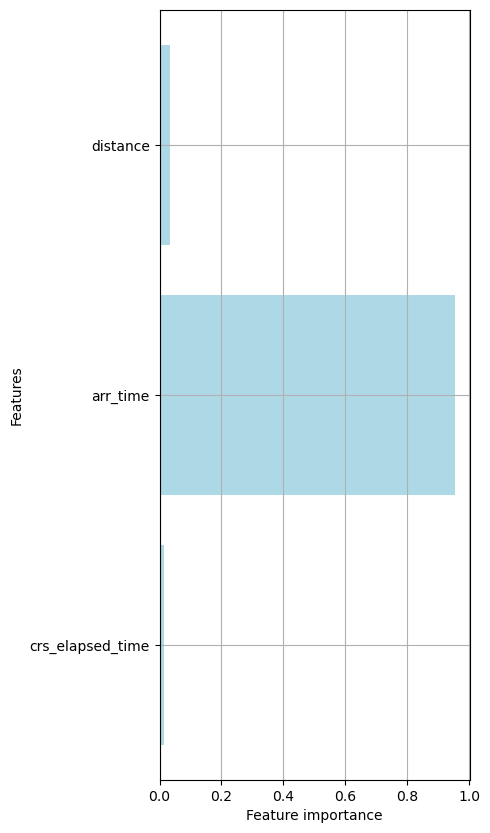

In [30]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(4, 10))
    plt.barh(range(n_features), model.feature_importances_, color='lightblue', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "yellow"
    plt.grid(True)
plot_feature_importances(tree_clf)

In [31]:
# Test set predictions
pred = tree_clf.predict(X_test)

In [32]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,376375,5588,381963
1,192628,13613,206241
All,569003,19201,588204


In [33]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.99      0.79    381963
           1       0.71      0.07      0.12    206241

    accuracy                           0.66    588204
   macro avg       0.69      0.53      0.46    588204
weighted avg       0.68      0.66      0.56    588204



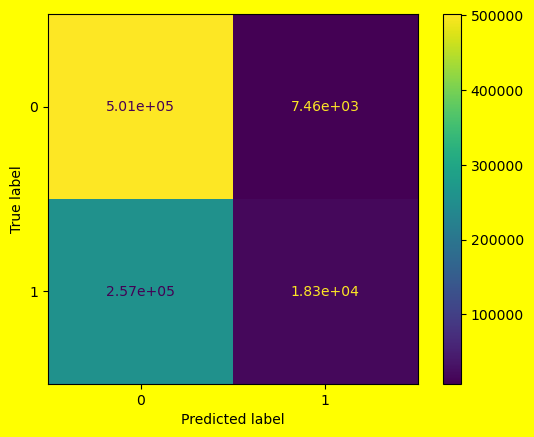

In [34]:
# Alternative confusion matrix
plot_confusion_matrix(tree_clf, X, y, values_format='.3g')

plt.show()

## XGBOOST

In [35]:

!pip install xgboost

In [36]:
import xgboost as xgb

In [37]:
data_xgmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [38]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 9, alpha = 10, n_estimators = 250 )

In [39]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [40]:
xg_pred=xg_reg.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
rmse = np.sqrt(mean_squared_error(y_test,xg_pred))
print('rmse:', rmse)

rmse: 0.46523016412971757


In [44]:
mae = mean_absolute_error(y_test,xg_pred)
print('mae:', mae)

mae: 0.43249319377270884


In [45]:
metrics.r2_score(y_test,xg_pred)

0.04940532698442257

In [46]:
diff_xg = xg_pred-y_test

In [47]:
xgbst_df = pd.DataFrame({'xg_pred': xg_pred, 'y_test':y_test, 'diff':diff_xg})
xgbst_df

,xg_pred,y_test,diff
102181,0.294387,0,0.294387
684362,0.308665,0,0.308665
130375,0.250943,0,0.250943
411617,0.454685,1,-0.545315
409152,0.182100,0,0.182100
...,...,...,...
259885,0.363888,0,0.363888
366823,0.473509,1,-0.526491
132298,0.472404,1,-0.527596
672943,0.215594,0,0.215594


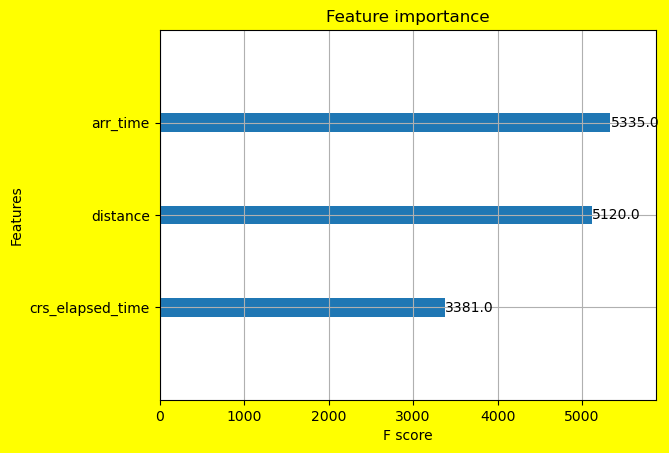

In [48]:
# plotting
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize']=[50,50]

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

In [49]:
fl_test_eval = pd.read_csv('/Users/kamininayyar/flightstest3')
fl_test_eval.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01 00:00:00,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01 00:00:00,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363


In [50]:
fl_test_eval

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01 00:00:00,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01 00:00:00,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01 00:00:00,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01 00:00:00,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01 00:00:00,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660551,2020-01-31 00:00:00,DL,DL_CODESHARE,DL,4954,9E,N926XJ,4954,11278,DCA,"Washington, DC",11193,CVG,"Cincinnati, OH",1859,2041,N,102,1,411
660552,2020-01-31 00:00:00,DL,DL_CODESHARE,DL,4955,9E,N309PQ,4955,11278,DCA,"Washington, DC",11193,CVG,"Cincinnati, OH",1515,1702,N,107,1,411
660553,2020-01-31 00:00:00,DL,DL_CODESHARE,DL,4956,9E,N324PQ,4956,12478,JFK,"New York, NY",10785,BTV,"Burlington, VT",2205,2337,N,92,1,266
660554,2020-01-31 00:00:00,DL,DL_CODESHARE,DL,4957,9E,N132EV,4957,13930,ORD,"Chicago, IL",12478,JFK,"New York, NY",1035,1356,N,141,1,740


In [51]:
flight_test_eval = fl_test_eval.loc[fl_test_eval["fl_date"].between("2020-01-01", "2020-01-08")]
flight_test_eval

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01 00:00:00,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01 00:00:00,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01 00:00:00,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01 00:00:00,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01 00:00:00,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,2020-01-07 00:00:00,DL,DL_CODESHARE,DL,4813,9E,N605LR,4813,11433,DTW,"Detroit, MI",12478,JFK,"New York, NY",1755,1952,N,117,1,509
150619,2020-01-07 00:00:00,DL,DL_CODESHARE,DL,4814,9E,N919XJ,4814,11996,GSP,"Greer, SC",12953,LGA,"New York, NY",600,759,N,119,1,610
150620,2020-01-07 00:00:00,DL,DL_CODESHARE,DL,4815,9E,N936XJ,4815,10397,ATL,"Atlanta, GA",15919,XNA,"Fayetteville, AR",1715,1816,N,121,1,589
150621,2020-01-07 00:00:00,DL,DL_CODESHARE,DL,4815,9E,N936XJ,4815,15919,XNA,"Fayetteville, AR",10397,ATL,"Atlanta, GA",1851,2145,N,114,1,589


In [55]:
flight_test_eval.to_csv('/Users/kamininayyar/Documents/GitHub/flight_test_eval.csv', index=False)

In [ ]:
week_one = pd.read_csv('/Users/kamininayyar/Downloads/week_one.csv')
week_one.head(2).append(week_one.tail(2))

In [52]:
# Create features (X) and labels (y)
y = flight_test_eval['flights']
X = flight_test_eval.drop(['flights'], axis=1)

In [53]:
# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
# Build a regular tree as baseline
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

ValueError: could not convert string to float: '2020-01-01 00:00:00'

In [56]:
final_prediction = xg_reg.predict(f)
is_there_delay = pd.DataFrame(final_prediciton).rename(columns={0: 'Delay?'})
is_there_delay

NameError: name 'f' is not defined

In [57]:
xg_pred=xg_reg.predict(X_test)

ValueError: Feature shape mismatch, expected: 3, got 19

In [ ]:
week_one = week_one.values

xgb.fit(week_one, )
pred = xgb.predict(df_test)